# **(Data-Understanding and Further Cleaning)**

## Objectives

* Discover how various house attributes correlate with the final sale price. (Business Requirement 1)

* Analyse variables containing missing values and fill them in appropriately

## Inputs

* outputs/datasets/collection/inherited.csv

* outputs/datasets/collection/original.csv

## Outputs

* Relevant plots so the client can quickly visualize the results of the correlation analysis. (How certain features may impact the sale price)

* outputs/datasets/collection/original_no_nan.csv

* outputs/datasets/collection/further_analysis.csv


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/milestone-project-heritage-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/milestone-project-heritage-housing-issues'

## Load Data

In [4]:
import pandas as pd

df_original = pd.read_csv("outputs/datasets/collection/original.csv")

df_original.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854,3,No,706,GLQ,150,0,548,RFn,...,65.0,196.0,61,5,7,856,0,2003,2003,208500
1,1262,0,3,Gd,978,ALQ,284,0,460,RFn,...,80.0,0.0,0,8,6,1262,0,1976,1976,181500
2,920,866,3,Mn,486,GLQ,434,0,608,RFn,...,68.0,162.0,42,5,7,920,0,2001,2002,223500
3,961,0,0,No,216,ALQ,540,0,642,Unf,...,60.0,0.0,35,5,7,756,0,1915,1970,140000
4,1145,0,4,Av,655,GLQ,490,0,836,RFn,...,84.0,350.0,84,5,8,1145,0,2000,2000,250000


---

# Pandas Profiling Report

In [5]:
from pandas_profiling import ProfileReport

report_on_house_records = ProfileReport(df=df_original, title='An overview of the original dataset', minimal=True)
report_on_house_records.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

- To OneHotEncode categorical variables, missing values will need to be removed.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_original.head(8)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854,3,No,706,GLQ,150,0,548,RFn,...,65.0,196.0,61,5,7,856,0,2003,2003,208500
1,1262,0,3,Gd,978,ALQ,284,0,460,RFn,...,80.0,0.0,0,8,6,1262,0,1976,1976,181500
2,920,866,3,Mn,486,GLQ,434,0,608,RFn,...,68.0,162.0,42,5,7,920,0,2001,2002,223500
3,961,0,0,No,216,ALQ,540,0,642,Unf,...,60.0,0.0,35,5,7,756,0,1915,1970,140000
4,1145,0,4,Av,655,GLQ,490,0,836,RFn,...,84.0,350.0,84,5,8,1145,0,2000,2000,250000
5,796,566,1,No,732,GLQ,64,0,480,Unf,...,85.0,0.0,30,5,5,796,0,1993,1995,143000
6,1694,0,3,Av,1369,GLQ,317,0,636,RFn,...,75.0,186.0,57,5,8,1686,0,2004,2005,307000
7,1107,983,3,Mn,859,ALQ,216,0,484,NaN,...,NaN,240.0,204,6,7,1107,0,1973,1973,200000


In [8]:
df_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1460 non-null   int64  
 2   BedroomAbvGr   1460 non-null   int64  
 3   BsmtExposure   1460 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1346 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  1460 non-null   int64  
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1298 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1460 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

###     Assess the variables with missing values to determine if/how to fill them or drop them.

- After looking at the BsmtFinType1 one column again I replaced the nan values with 'none'. I felt in this dataset they were saying the same thing, i.e. there were no finishes in the basement.

    - I plotted a bar plot to see what the distribution was like before and after the change.

In [9]:
columns_with_nan = df_original.columns[df_original.isna().sum() > 0].to_list()
columns_with_nan

df_original[columns_with_nan].isna().sum()

BsmtFinType1    114
GarageFinish    162
GarageYrBlt      81
LotFrontage     259
dtype: int64

In [10]:
print(df_original['BsmtFinType1'].value_counts())
print(df_original['BsmtFinType1'].unique())

Unf     396
GLQ     385
ALQ     202
BLQ     136
Rec     126
LwQ      70
None     31
Name: BsmtFinType1, dtype: int64
['GLQ' 'ALQ' 'Unf' 'Rec' nan 'BLQ' 'None' 'LwQ']


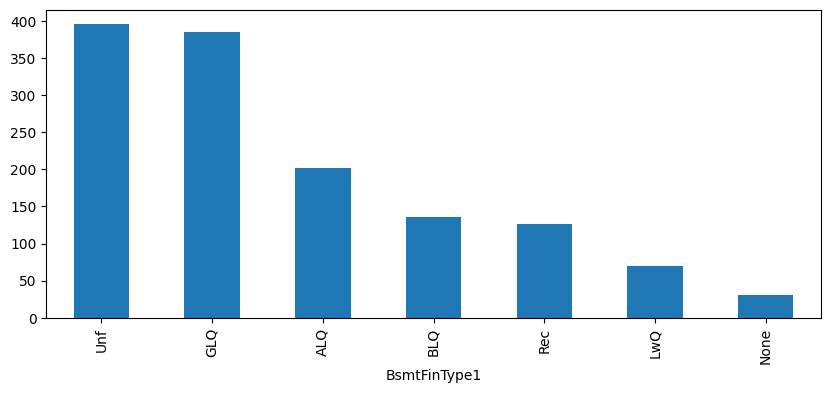

In [11]:
%matplotlib inline
df_original.value_counts('BsmtFinType1').plot(kind='bar', figsize=(10,4))
plt.show()

In [12]:
df_original['BsmtFinType1'] = df_original['BsmtFinType1'].fillna(value='None')

In [13]:
print(df_original['BsmtFinType1'].value_counts())
print(df_original['BsmtFinType1'].unique())

Unf     396
GLQ     385
ALQ     202
None    145
BLQ     136
Rec     126
LwQ      70
Name: BsmtFinType1, dtype: int64
['GLQ' 'ALQ' 'Unf' 'Rec' 'None' 'BLQ' 'LwQ']


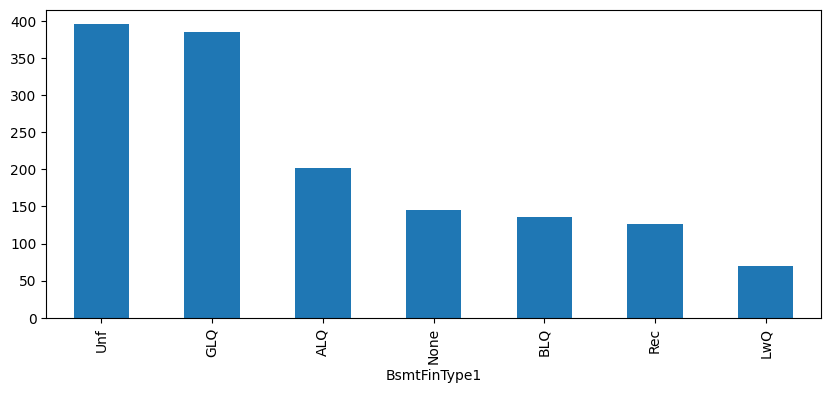

In [14]:
%matplotlib inline
df_original.value_counts('BsmtFinType1').plot(kind='bar', figsize=(10,4))
plt.show()

- I approached GarageFinish in the same way and grouped the nan values into the 'None' category

In [15]:
print(df_original['GarageFinish'].value_counts())
print(df_original['GarageFinish'].unique())

Unf     546
RFn     366
Fin     313
None     73
Name: GarageFinish, dtype: int64
['RFn' 'Unf' nan 'Fin' 'None']


<AxesSubplot:xlabel='GarageFinish'>

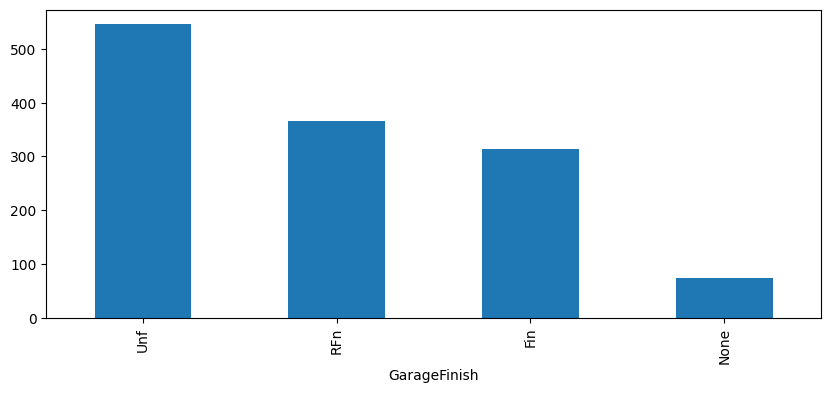

In [16]:
%matplotlib inline
df_original.value_counts('GarageFinish').plot(kind='bar', figsize=(10,4))

In [17]:
df_original['GarageFinish'] = df_original['GarageFinish'].fillna(value='None')
print(df_original['GarageFinish'].value_counts())
print(df_original['GarageFinish'].unique())

Unf     546
RFn     366
Fin     313
None    235
Name: GarageFinish, dtype: int64
['RFn' 'Unf' 'None' 'Fin']


<AxesSubplot:xlabel='GarageFinish'>

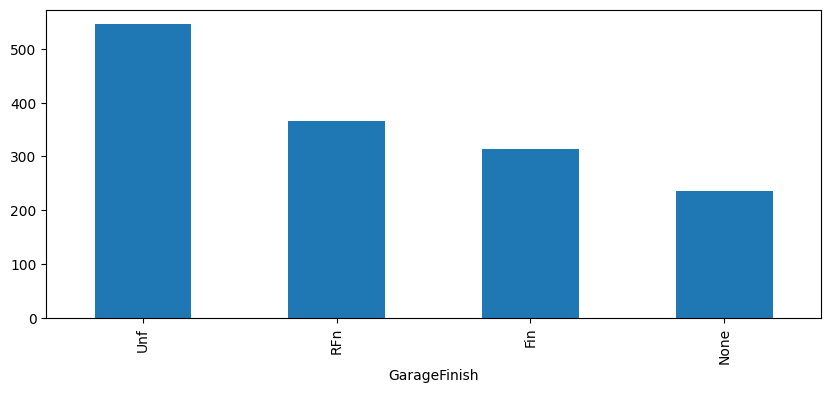

In [18]:
%matplotlib inline
df_original.value_counts('GarageFinish').plot(kind='bar', figsize=(10,4))

- Grouping 'None' and 'No' in BsmtExposure to create a single category

In [19]:
# Locate the rows of the BsmtExposure column and replace None with No as these have the same meaning.

df_original['BsmtExposure'].replace('None', 'No', inplace=True)
print(tuple(df_original['BsmtExposure'].unique()))

('No', 'Gd', 'Mn', 'Av')


- From looking at the histogram in the Pandas profiling report above for GarageYrBlt, I could see that the distribution of values was not normal. 

- The mean and median are close in terms of when the properties were built so I will fill nan values in this catgory with the median value for this category.

In [20]:
print(df_original['GarageYrBlt'].mean())
print(df_original['GarageYrBlt'].median())

1978.5061638868744
1980.0


<AxesSubplot:ylabel='Frequency'>

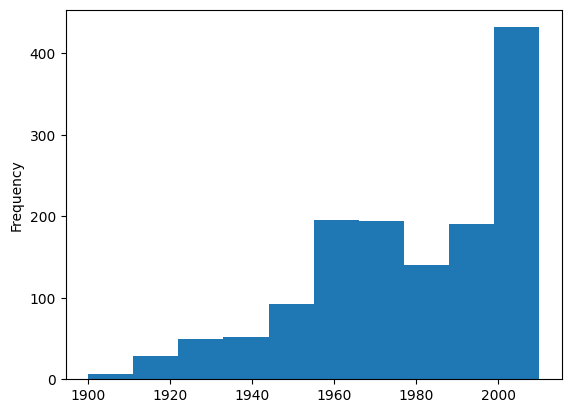

In [21]:
%matplotlib inline
df_original['GarageYrBlt'].plot(kind='hist', y='GarageYrBlt', bins=10)

In [22]:
columns_with_nan = df_original.columns[df_original.isna().sum() > 0].to_list()
columns_with_nan

['GarageYrBlt', 'LotFrontage']

In [23]:
df_original['GarageYrBlt'] = df_original['GarageYrBlt'].fillna(df_original['GarageYrBlt'].median())

In [24]:
columns_with_nan = df_original.columns[df_original.isna().sum() > 0].to_list()
columns_with_nan

['LotFrontage']

<AxesSubplot:ylabel='Frequency'>

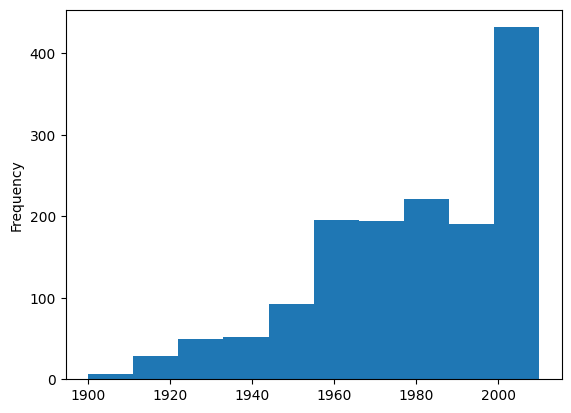

In [25]:
%matplotlib inline
df_original['GarageYrBlt'].plot(kind='hist', y='GarageYrBlt', bins=10)

- Lot Frontage: I filled the nan values with the median again here. Histograms plotted to show the before and after effects.

<AxesSubplot:ylabel='Frequency'>

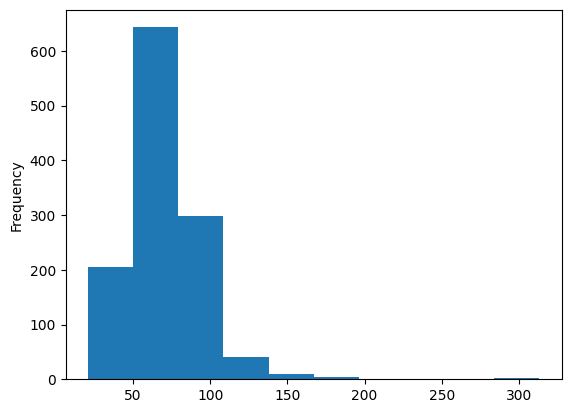

In [26]:
%matplotlib inline
df_original['LotFrontage'].plot(kind='hist', y='LotFrontage', bins=10)

In [27]:
columns_with_nan = df_original.columns[df_original.isna().sum() > 0].to_list()
columns_with_nan

['LotFrontage']

In [28]:
print(df_original['LotFrontage'].mean())
print(df_original['LotFrontage'].median())

70.04995836802665
69.0


In [29]:
df_original['LotFrontage'] = df_original['LotFrontage'].fillna(df_original['LotFrontage'].median())

69.86369863013698
69.0


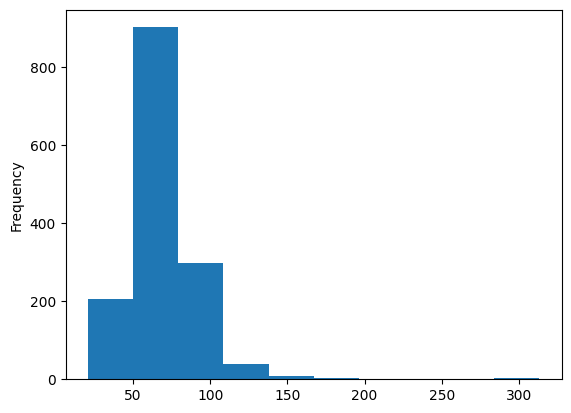

In [30]:
%matplotlib inline
df_original['LotFrontage'].plot(kind='hist', y='LotFrontage', bins=10)
print(df_original['LotFrontage'].mean())
print(df_original['LotFrontage'].median())

#### Categorical variables can now be OneHotEncoded

In [31]:
from feature_engine.encoding import OneHotEncoder

encoder = OneHotEncoder(variables=df_original.columns[df_original.dtypes == 'object'].tolist(), drop_last=False)

encoded_df = encoder.fit_transform(df_original)

print(encoded_df.shape)

encoded_df.head(5)

(1460, 39)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,...,BsmtFinType1_BLQ,BsmtFinType1_LwQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_None,GarageFinish_Fin,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,854,3,706,150,0,548,2003.0,1710,8450,...,0,0,1,0,0,0,1,0,0,0
1,1262,0,3,978,284,0,460,1976.0,1262,9600,...,0,0,1,0,0,0,0,1,0,0
2,920,866,3,486,434,0,608,2001.0,1786,11250,...,0,0,1,0,0,0,1,0,0,0
3,961,0,0,216,540,0,642,1998.0,1717,9550,...,0,0,0,1,0,0,1,0,0,0
4,1145,0,4,655,490,0,836,2000.0,2198,14260,...,0,0,1,0,0,0,1,0,0,0


In [32]:
spearman_correlation = encoded_df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
spearman_correlation 

OverallQual       0.809829
GrLivArea         0.731310
YearBuilt         0.652682
GarageArea        0.649379
TotalBsmtSF       0.602725
KitchenQual_TA   -0.581803
1stFlrSF          0.575408
YearRemodAdd      0.571159
GarageYrBlt       0.563256
KitchenQual_Gd    0.478583
Name: SalePrice, dtype: float64

In [33]:
pearson_correlation = encoded_df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
pearson_correlation 

OverallQual       0.790982
GrLivArea         0.708624
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
YearBuilt         0.522897
KitchenQual_TA   -0.519298
YearRemodAdd      0.507101
KitchenQual_Ex    0.504094
MasVnrArea        0.472614
Name: SalePrice, dtype: float64

In [34]:
df_original['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

#### Observations from the spearmans and pearsons tests.

- OverallQual and GrLivArea look highly correlated with sale price which at this stage looks to strengthen the initial hypothesis

- KitchenQual which is average shows negative correlation with sale price

- KitchenQual which is Gd/Ex is showing positive correlation. This ranking of KitchenQual is important to consider further

- I will consider further, all features that returned values above 0.5 for either test


In [35]:
columns_of_interest = ['OverallQual', 'GrLivArea', 'YearBuilt', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearRemodAdd', 'GarageYrBlt', 'KitchenQual']

columns_of_interest

['OverallQual',
 'GrLivArea',
 'YearBuilt',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'YearRemodAdd',
 'GarageYrBlt',
 'KitchenQual']

### EDA on selected variables

In [36]:
df_further_analyis = df_original.filter(columns_of_interest + ['SalePrice'])
df_further_analyis.head(10)
print(df_further_analyis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   GarageArea    1460 non-null   int64  
 4   TotalBsmtSF   1460 non-null   int64  
 5   1stFlrSF      1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   GarageYrBlt   1460 non-null   float64
 8   KitchenQual   1460 non-null   object 
 9   SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 114.2+ KB
None


- Changing GarageYrBuilt data type here to keep things uniform.

In [37]:
df_further_analyis['GarageYrBlt'] = df_further_analyis['GarageYrBlt'].astype('int')
print(df_further_analyis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1460 non-null   int64 
 1   GrLivArea     1460 non-null   int64 
 2   YearBuilt     1460 non-null   int64 
 3   GarageArea    1460 non-null   int64 
 4   TotalBsmtSF   1460 non-null   int64 
 5   1stFlrSF      1460 non-null   int64 
 6   YearRemodAdd  1460 non-null   int64 
 7   GarageYrBlt   1460 non-null   int64 
 8   KitchenQual   1460 non-null   object
 9   SalePrice     1460 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 114.2+ KB
None


### *Plot variables for visualisation*

In [38]:
col = df_further_analyis['KitchenQual'].unique()
col

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

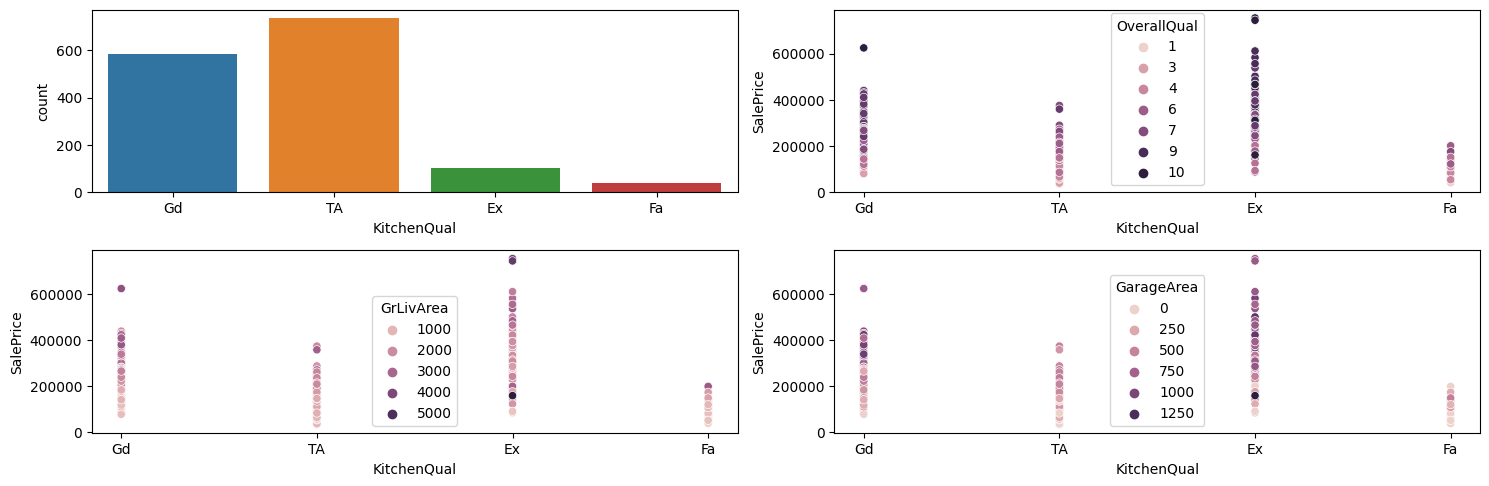

In [39]:
%matplotlib inline
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))
sns.countplot(data=df_further_analyis, x='KitchenQual',ax=ax1)
sns.scatterplot(data=df_further_analyis, x='KitchenQual', y='SalePrice', hue='OverallQual',ax=ax2)
sns.scatterplot(data=df_further_analyis, x='KitchenQual', y='SalePrice', hue='GrLivArea',ax=ax3)
sns.scatterplot(data=df_further_analyis, x='KitchenQual', y='SalePrice', hue='GarageArea',ax=ax4)
plt.tight_layout()
plt.show()

- The above plots show really good sale prices when houses contain 'Gd' 'Ex' grade of kitchens, coupled with high overall quality, good size living area, and have good garage area.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

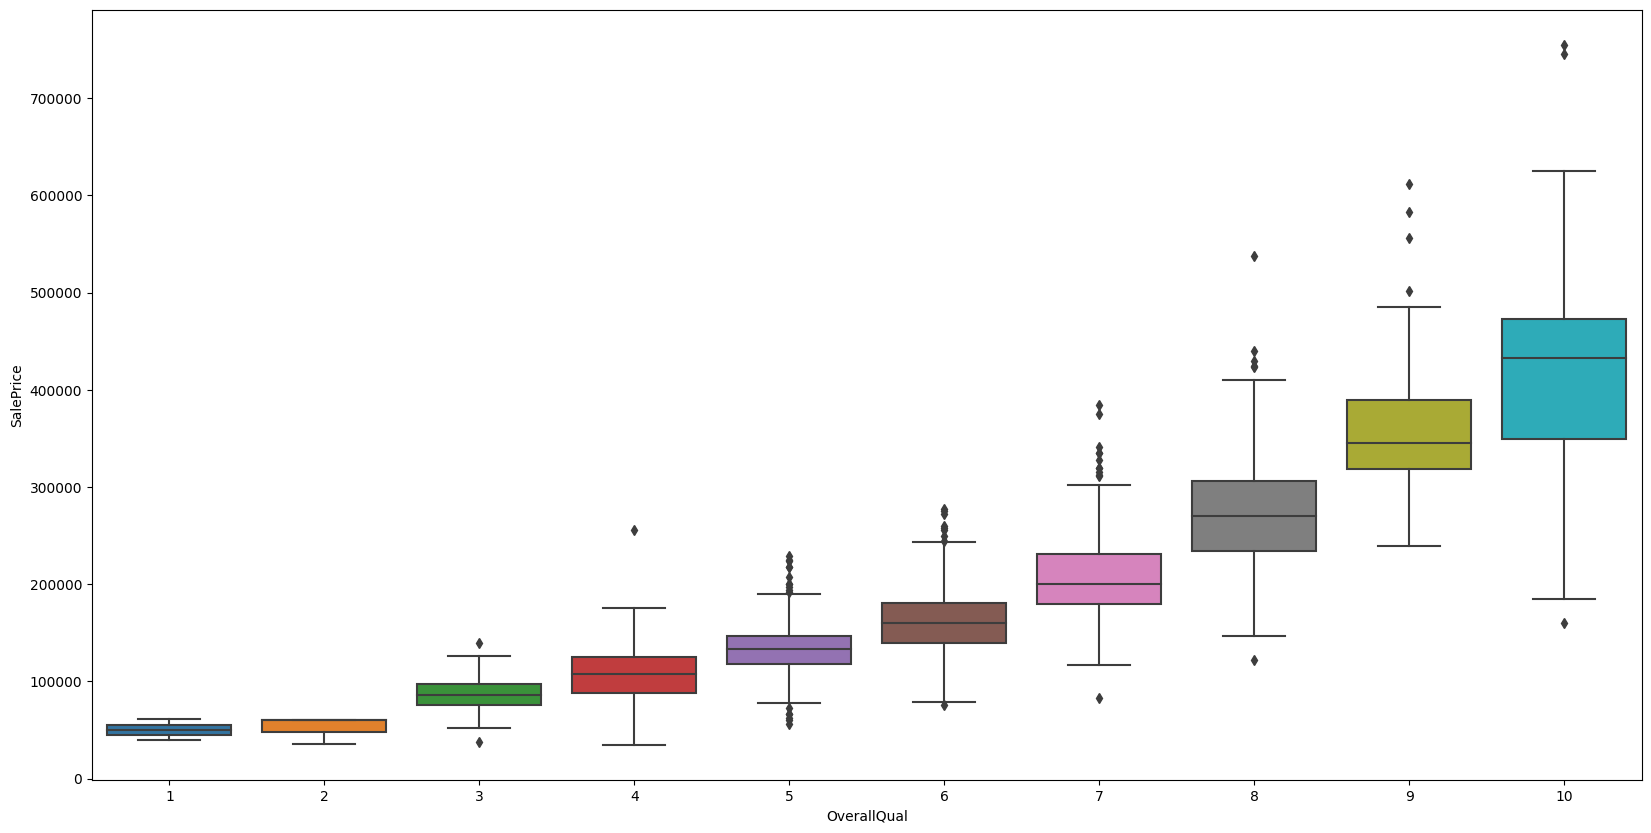

In [40]:
%matplotlib inline
fig = plt.figure(figsize=(20, 10))
sns.boxplot(data=df_further_analyis, x='OverallQual', y='SalePrice')


- This box plot shows how strong the correlation is between overall quality ratings between 8 and 10 and the eventual sale price. There are very few outliers in the negative direction in this group.

- The combined IQR for ratings 9 + 10 give an indication of a sale price between 320,000 and 480,000

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

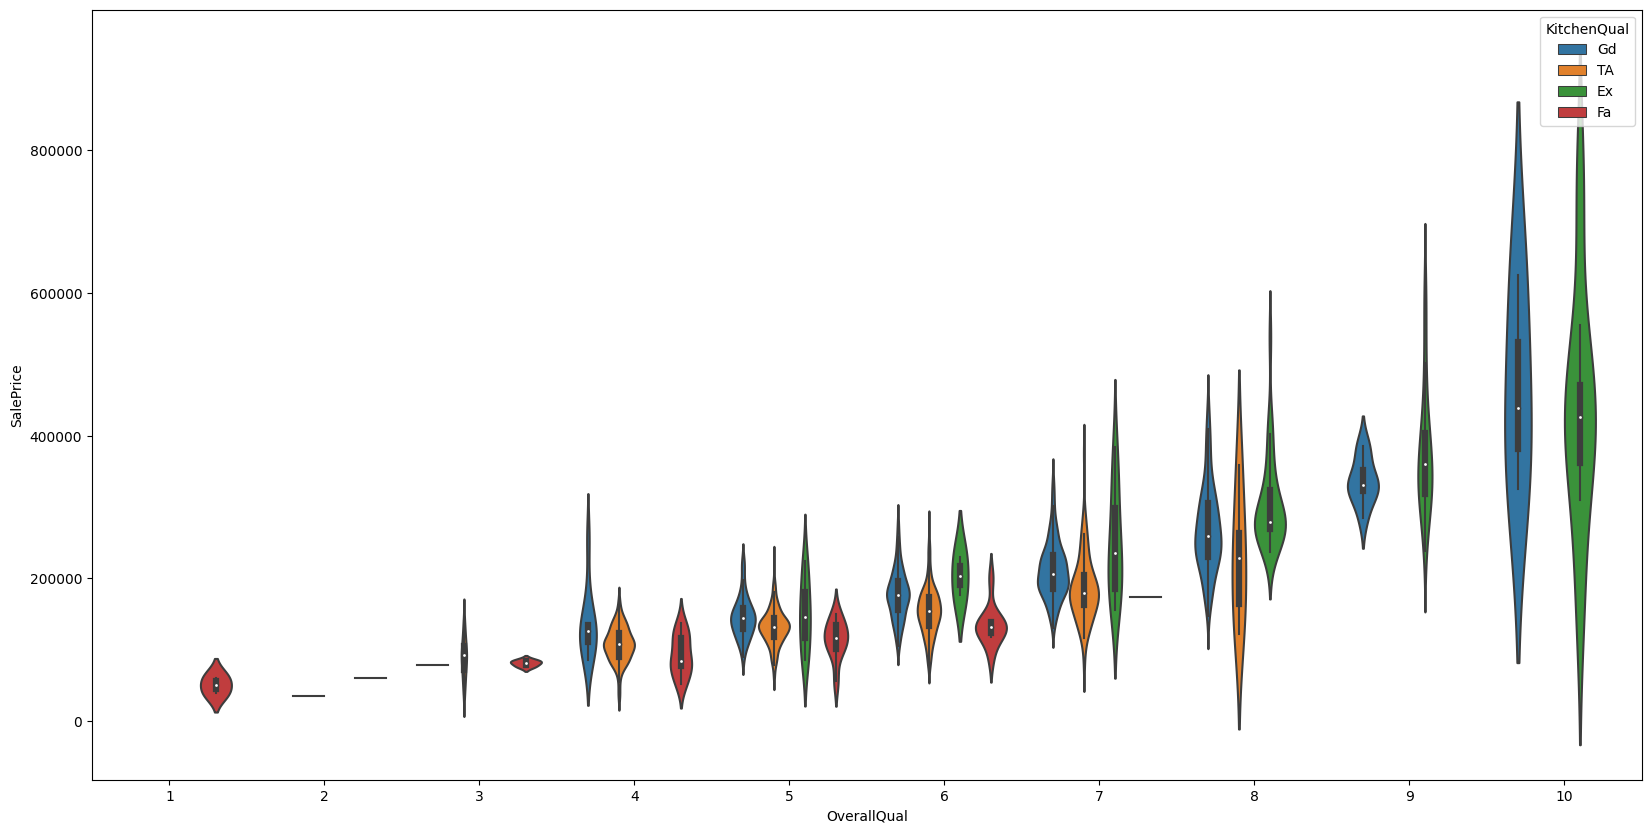

In [41]:
%matplotlib inline
fig = plt.figure(figsize=(20, 10))
sns.violinplot(data=df_further_analyis, x=df_further_analyis['OverallQual'], y=df_further_analyis['SalePrice'], hue='KitchenQual')

- This vertical viloin plot shows how few houses with a kitchen quality rating of TA(Typical,Average) managed a decent sale price. Category 8 shows this particularly well.

- The overall quality was high but the sale price has a negative correlation with kitchen quality.

- There is a considerable jump in sale price when kitchen quality is excellent to compliment the overall house condition.

<BarContainer object of 1460 artists>

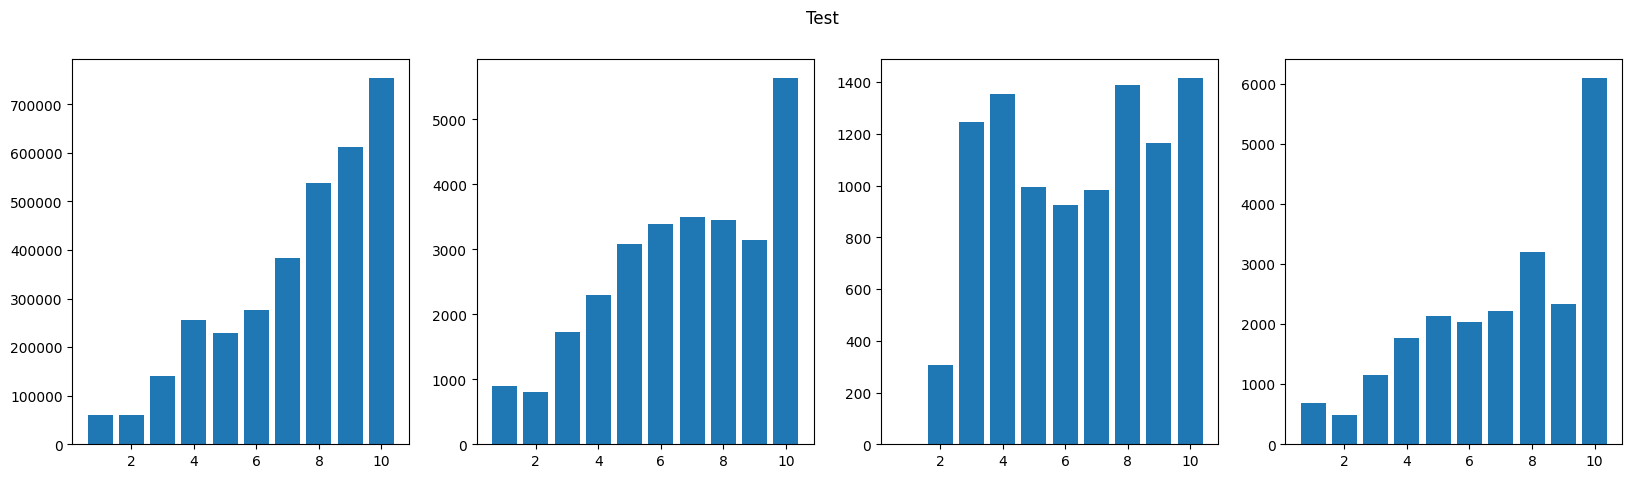

In [47]:
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle("Test")
axes[0].bar(data=df_further_analyis, x="OverallQual", height='SalePrice')
axes[1].bar(data=df_further_analyis, x="OverallQual", height='GrLivArea')
axes[2].bar(data=df_further_analyis, x="OverallQual", height='GarageArea')
axes[3].bar(data=df_further_analyis, x="OverallQual", height='TotalBsmtSF')

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

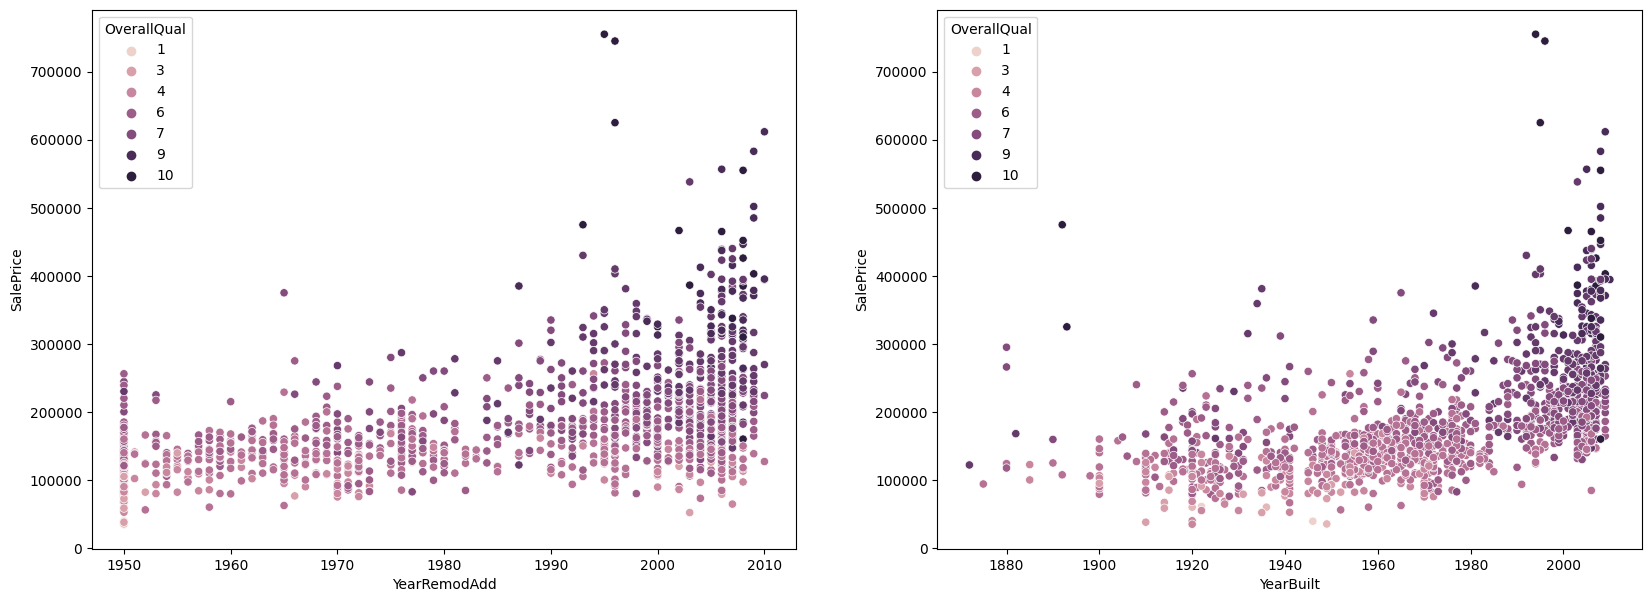

In [43]:
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.scatterplot(data=df_further_analyis, x='YearRemodAdd', y='SalePrice', hue='OverallQual', ax=ax1)
sns.scatterplot(data=df_further_analyis, x='YearBuilt', y='SalePrice', hue='OverallQual', ax=ax2)

- Modern houses showing correlation with sale price. Modern houses seem to have greater space and better finishesand thus a greater sale price.

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

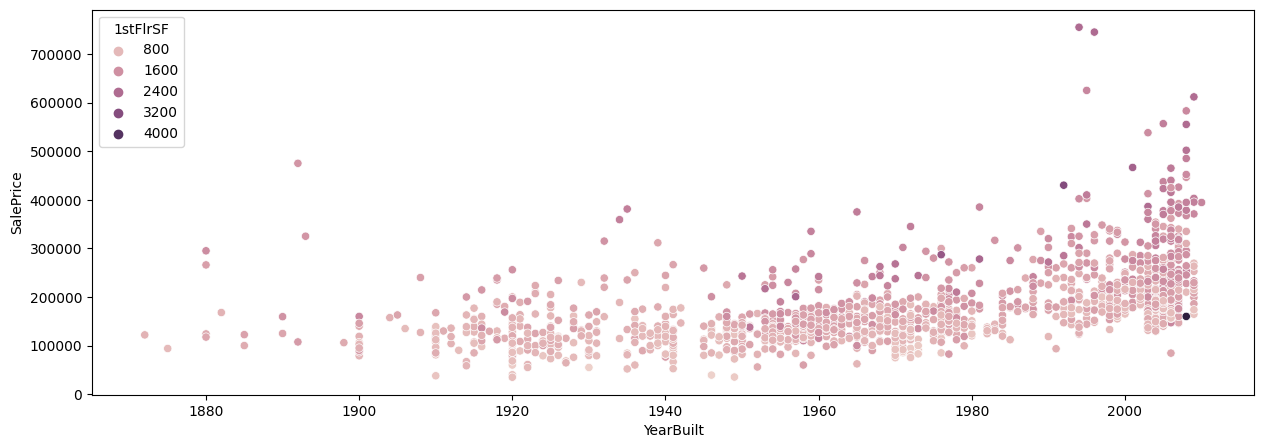

In [44]:
%matplotlib inline
fig =  plt.figure(figsize=(15,5))
sns.scatterplot(data=df_further_analyis, x='YearBuilt', y='SalePrice', hue='1stFlrSF')

- The above plot shows a greater number of larger houses after about 1970. This correlates to eventual sale price.

### Current conclusions from this analysis:

- The overall quality rating seems to be a key influence on sale price.

- This rating seems to be influenced heavily by the year it was built and/or the year any remodelling took place.

- The overall quality rating is influenced/complimented by a kitchen quality rating of at least good, but moreso excellent.

- To ensure a good sale price:

    - An overall quality rating between 8-10
    - An excellent grade of kitchen
    - A garage area that is large and finished well
    - Generally, more modern and spacious properties seem to fetch higher values.

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [46]:
df_original.to_csv(f"outputs/datasets/collection/original_no_nan.csv", index=False)
df_further_analyis.to_csv(f"outputs/datasets/collection/further_analysis.csv")
